In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train shape : ' + str(x_train.shape))
print('y_train shape : ' + str(y_train.shape))
print('x_test shape : ' + str(x_test.shape))
print('y_test shape : ' + str(y_test.shape))

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


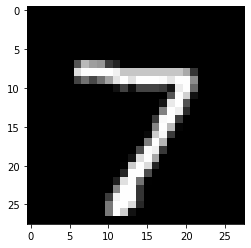

In [3]:
plt.imshow(x_test[0], cmap='gray')

In [4]:
print(y_test[0])

7


In [5]:
x_train = x_train.reshape(60000, 784).astype('float32')/255.0
x_test = x_test.reshape(10000, 784).astype('float32')/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
model = Sequential([
    Dense(64, input_dim=28*28, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

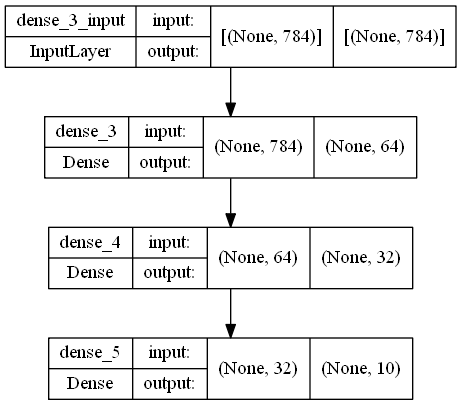

In [8]:
plot_model(model, show_shapes=True)

In [9]:
hist = model.fit(x_train, y_train,
                validation_split=0.2,
                batch_size=32,
                epochs = 100)

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3305 - accuracy: 0.9044 - val_loss: 0.1702 - val_accuracy: 0.9521
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1510 - accuracy: 0.9555 - val_loss: 0.1434 - val_accuracy: 0.9604
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1126 - accuracy: 0.9667 - val_loss: 0.1208 - val_accuracy: 0.9640
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0885 - accuracy: 0.9736 - val_loss: 0.1204 - val_accuracy: 0.9661
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0732 - accuracy: 0.9770 - val_loss: 0.1168 - val_accuracy: 0.9656
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0612 - accuracy: 0.9806 - val_loss: 0.1181 - val_accuracy: 0.9682
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0527 - accuracy: 0.9831 - val_loss: 0.1168 - val_ac

1500/1500 [==============================] - 2s 1ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.2513 - val_accuracy: 0.9711
Epoch 58/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.2529 - val_accuracy: 0.9717
Epoch 59/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.2819 - val_accuracy: 0.9698
Epoch 60/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.2417 - val_accuracy: 0.9723
Epoch 61/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.2506 - val_accuracy: 0.9712
Epoch 62/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.2539 - val_accuracy: 0.9734
Epoch 63/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.2850 - val_accuracy

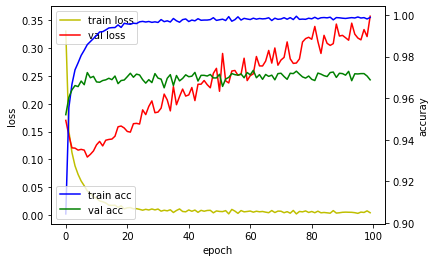

In [10]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label = 'train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [13]:
model = Sequential([
    Dense(64, input_dim = 28*28, activation = 'relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
    
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

checkpoint_callback = ModelCheckpoint("best_model.h5",
                                      save_best_only = True,
                                      monitor = "val_loss")

hist = model.fit(x_train, y_train,
                validation_split=0.2,
                batch_size = 32,
                epochs = 100,
                callbacks = [checkpoint_callback])

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3149 - accuracy: 0.9089 - val_loss: 0.1609 - val_accuracy: 0.9524
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1397 - accuracy: 0.9587 - val_loss: 0.1235 - val_accuracy: 0.9639
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1027 - accuracy: 0.9689 - val_loss: 0.1133 - val_accuracy: 0.9666
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0813 - accuracy: 0.9750 - val_loss: 0.1136 - val_accuracy: 0.9663
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.1158 - val_accuracy: 0.9678
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0568 - accuracy: 0.9819 - val_loss: 0.1130 - val_accuracy: 0.9675
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.1156 - val_ac

1500/1500 [==============================] - 2s 1ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.2476 - val_accuracy: 0.9742
Epoch 58/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.2504 - val_accuracy: 0.9740
Epoch 59/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.2459 - val_accuracy: 0.9746
Epoch 60/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.2435 - val_accuracy: 0.9751
Epoch 61/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.2609 - val_accuracy: 0.9740
Epoch 62/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.2628 - val_accuracy: 0.9742
Epoch 63/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.2749 - val_accuracy

In [14]:
model = load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

313/313 [==============================] - 0s 812us/step - loss: 0.0988 - accuracy: 0.9710
Test accuracy 0.9710000157356262
Test loss 0.0988222137093544


In [15]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=-1)
np.savetxt('y_pred.csv', y_pred, fmt='%d')